[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1MqSDjxi4xMJSPDA89rV1_oBhlYXmsOcl?usp=sharing#scrollTo=sQjZ_b7VQlIp)

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 4.1 MB/s 
     |████████████████████████████████| 40 kB 7.4 MB/s 
     |████████████████████████████████| 462 kB 15.1 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import tensorflow as tf
print('TensorFlow :', tf.__version__)

TensorFlow : 2.8.0


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras_preprocessing import image
from shutil import copyfile
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input

import zipfile
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#os.chdir("/content/drive/MyDrive/Main Dataset/") 
#os.listdir()
%cd /content/drive/MyDrive/JeDer/Main Dataset/
!ls

/content/drive/.shortcut-targets-by-id/1ew_-3LDZm95gu_lgw9kcoG5f7ZXoeSOZ/Main Dataset
'Akar Kelapa'  'Kue Bangkit'   Nastar	    Sate
 Bakmi	       'Kue Tambang'  'Onde Onde'  'Semur Tahu'
 Bakso	       'Nasi Goreng'   Rendang	   'Tempe Orek'


In [ ]:
try:
    os.mkdir('/content/drive/MyDrive/JeDer/Food/')
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/', 'training'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/', 'testing'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/training', 'Akar Kelapa'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/training', 'Bakmi'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/training', 'Bakso'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/training', 'Kue Bangkit'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/training', 'Kue Tambang'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/training', 'Nasi Goreng'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/training', 'Nastar'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/training', 'Onde Onde'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/training', 'Rendang'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/training', 'Sate'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/training', 'Semur Tahu'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/training', 'Tempe Orek'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/testing', 'Akar Kelapa'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/testing', 'Bakmi'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/testing', 'Bakso'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/testing', 'Kue Bangkit'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/testing', 'Kue Tambang'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/testing', 'Nasi Goreng'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/testing', 'Nastar'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/testing', 'Onde Onde'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/testing', 'Rendang'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/testing', 'Sate'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/testing', 'Semur Tahu'))
    os.mkdir(os.path.join('/content/drive/MyDrive/JeDer/Food/testing', 'Tempe Orek'))
except OSError:
    pass

In [ ]:
print('Akar Kelapa images:', len(os.listdir('/content/drive/MyDrive/JeDer/Main Dataset/Akar Kelapa/')))
print('Bakmi images:', len(os.listdir('/content/drive/MyDrive/JeDer/Main Dataset/Bakmi/')))
print('Bakso images:', len(os.listdir('/content/drive/MyDrive/JeDer/Main Dataset/Bakso/')))
print('Kue Bangkit images:', len(os.listdir('/content/drive/MyDrive/JeDer/Main Dataset/Kue Bangkit/')))
print('Kue Tambang images:', len(os.listdir('/content/drive/MyDrive/JeDer/Main Dataset/Kue Tambang/')))
print('Nasi Goreng images:', len(os.listdir('/content/drive/MyDrive/JeDer/Main Dataset/Nasi Goreng/')))
print('Nastar images:', len(os.listdir('/content/drive/MyDrive/JeDer/Main Dataset/Nastar/')))
print('Onde Onde images:', len(os.listdir('/content/drive/MyDrive/JeDer/Main Dataset/Onde Onde/')))
print('Rendang images:', len(os.listdir('/content/drive/MyDrive/JeDer/Main Dataset/Rendang/')))
print('Sate images:', len(os.listdir('/content/drive/MyDrive/JeDer/Main Dataset/Sate/')))
print('Semur Tahu images:', len(os.listdir('/content/drive/MyDrive/JeDer/Main Dataset/Semur Tahu/')))
print('Orek Tempe images:', len(os.listdir('/content/drive/MyDrive/JeDer/Main Dataset/Tempe Orek/')))


Akar Kelapa images: 38
Bakmi images: 40
Bakso images: 40
Kue Bangkit images: 40
Kue Tambang images: 40
Nasi Goreng images: 39
Nastar images: 40
Onde Onde images: 39
Rendang images: 40
Sate images: 40
Semur Tahu images: 40
Orek Tempe images: 40


In [ ]:
def split_data(SOURCE, TRAINING, TESTING, VALIDATION, SPLIT_SIZE):
    # YOUR CODE STARTS HERE
    if not os.path.exists(TRAINING): 
        os.makedirs(TRAINING) 
                
    if not os.path.exists(TESTING): 
        os.makedirs(TESTING) 

    if not os.path.exists(VALIDATION): 
        os.makedirs(VALIDATION)

    file_names = os.listdir(SOURCE) 
    file_number = len(file_names) 

    for index, file in enumerate(file_names): 
        if index < SPLIT_SIZE * file_number: 
          if index < 0.8 * file_number:
            copyfile(os.path.join(SOURCE, file), os.path.join(TRAINING, file))
          else:
            copyfile(os.path.join(SOURCE, file), os.path.join(VALIDATION, file))
        else: 
            copyfile(os.path.join(SOURCE, file), os.path.join(TESTING, file)) 
        
AKEL_SOURCE_DIR = "/content/drive/MyDrive/JeDer/Main Dataset/Akar Kelapa/"
BAKMI_SOURCE_DIR = "/content/drive/MyDrive/JeDer/Main Dataset/Bakmi/"
BAKSO_SOURCE_DIR = "/content/drive/MyDrive/JeDer/Main Dataset/Bakso/"
KBANGKIT_SOURCE_DIR = "/content/drive/MyDrive/JeDer/Main Dataset/Kue Bangkit/"
KTAMBANG_SOURCE_DIR = "/content/drive/MyDrive/JeDer/Main Dataset/Kue Tambang/"
NASGOR_SOURCE_DIR = "/content/drive/MyDrive/JeDer/Main Dataset/Nasi Goreng/"
NASTAR_SOURCE_DIR = "/content/drive/MyDrive/JeDer/Main Dataset/Nastar/"
ONDE_SOURCE_DIR = "/content/drive/MyDrive/JeDer/Main Dataset/Onde Onde/"
RENDANG_SOURCE_DIR = "/content/drive/MyDrive/JeDer/Main Dataset/Rendang/"
SATE_SOURCE_DIR = "/content/drive/MyDrive/JeDer/Main Dataset/Sate/"
SEMTAHU_SOURCE_DIR = "/content/drive/MyDrive/JeDer/Main Dataset/Semur Tahu/"
ORTEMPE_SOURCE_DIR = "/content/drive/MyDrive/JeDer/Main Dataset/Tempe Orek/"

TRAINING_AKEL_DIR = "/content/drive/MyDrive/JeDer/Food/training/Akar Kelapa/"
TRAINING_BAKMI_DIR = "/content/drive/MyDrive/JeDer/Food/training/Bakmi/"
TRAINING_BAKSO_DIR = "/content/drive/MyDrive/JeDer/Food/training/Bakso/"
TRAINING_KBANGKIT_DIR = "/content/drive/MyDrive/JeDer/Food/training/Kue Bangkit/"
TRAINING_KTAMBANG_DIR = "/content/drive/MyDrive/JeDer/Food/training/Kue Tambang/"
TRAINING_NASGOR_DIR = "/content/drive/MyDrive/JeDer/Food/training/Nasi Goreng/"
TRAINING_NASTAR_DIR = "/content/drive/MyDrive/JeDer/Food/training/Nastar/"
TRAINING_ONDE_DIR = "/content/drive/MyDrive/JeDer/Food/training/Onde Onde/"
TRAINING_RENDANG_DIR = "/content/drive/MyDrive/JeDer/Food/training/Rendang/"
TRAINING_SATE_DIR = "/content/drive/MyDrive/JeDer/Food/training/Sate/"
TRAINING_SEMTAHU_DIR = "/content/drive/MyDrive/JeDer/Food/training/Semur Tahu/"
TRAINING_ORTEMPE_DIR = "/content/drive/MyDrive/JeDer/Food/training/Orek Tempe/"

TESTING_AKEL_DIR = "/content/drive/MyDrive/JeDer/Food/testing/Akar Kelapa/"
TESTING_BAKMI_DIR = "/content/drive/MyDrive/JeDer/Food/testing/Bakmi/"
TESTING_BAKSO_DIR = "/content/drive/MyDrive/JeDer/Food/testing/Bakso/"
TESTING_KBANGKIT_DIR = "/content/drive/MyDrive/JeDer/Food/testing/Kue Bangkit/"
TESTING_KTAMBANG_DIR = "/content/drive/MyDrive/JeDer/Food/testing/Kue Tambang/"
TESTING_NASGOR_DIR = "/content/drive/MyDrive/JeDer/Food/testing/Nasi Goreng/"
TESTING_NASTAR_DIR = "/content/drive/MyDrive/JeDer/Food/testing/Nastar/"
TESTING_ONDE_DIR = "/content/drive/MyDrive/JeDer/Food/testing/Onde Onde/"
TESTING_RENDANG_DIR = "/content/drive/MyDrive/JeDer/Food/testing/Rendang/"
TESTING_SATE_DIR = "/content/drive/MyDrive/JeDer/Food/testing/Sate/"
TESTING_SEMTAHU_DIR = "/content/drive/MyDrive/JeDer/Food/testing/Semur Tahu/"
TESTING_ORTEMPE_DIR = "/content/drive/MyDrive/JeDer/Food/testing/Orek Tempe/"

VALIDATION_AKEL_DIR = "/content/drive/MyDrive/JeDer/Food/validation/Akar Kelapa/"
VALIDATION_BAKMI_DIR = "/content/drive/MyDrive/JeDer/Food/validation/Bakmi/"
VALIDATION_BAKSO_DIR = "/content/drive/MyDrive/JeDer/Food/validation/Bakso/"
VALIDATION_KBANGKIT_DIR = "/content/drive/MyDrive/JeDer/Food/validation/Kue Bangkit/"
VALIDATION_KTAMBANG_DIR = "/content/drive/MyDrive/JeDer/Food/validation/Kue Tambang/"
VALIDATION_NASGOR_DIR = "/content/drive/MyDrive/JeDer/Food/validation/Nasi Goreng/"
VALIDATION_NASTAR_DIR = "/content/drive/MyDrive/JeDer/Food/validation/Nastar/"
VALIDATION_ONDE_DIR = "/content/drive/MyDrive/JeDer/Food/validation/Onde Onde/"
VALIDATION_RENDANG_DIR = "/content/drive/MyDrive/JeDer/Food/validation/Rendang/"
VALIDATION_SATE_DIR = "/content/drive/MyDrive/JeDer/Food/validation/Sate/"
VALIDATION_SEMTAHU_DIR = "/content/drive/MyDrive/JeDer/Food/validation/Semur Tahu/"
VALIDATION_ORTEMPE_DIR = "/content/drive/MyDrive/JeDer/Food/validation/Orek Tempe/"

split_size = .8
split_data(AKEL_SOURCE_DIR, TRAINING_AKEL_DIR, TESTING_AKEL_DIR, VALIDATION_AKEL_DIR, split_size)
split_data(BAKMI_SOURCE_DIR, TRAINING_BAKMI_DIR, TESTING_BAKMI_DIR, VALIDATION_BAKMI_DIR, split_size)
split_data(BAKSO_SOURCE_DIR, TRAINING_BAKSO_DIR, TESTING_BAKSO_DIR, VALIDATION_BAKSO_DIR, split_size)
split_data(KBANGKIT_SOURCE_DIR, TRAINING_KBANGKIT_DIR, TESTING_KBANGKIT_DIR, VALIDATION_KBANGKIT_DIR, split_size)
split_data(KTAMBANG_SOURCE_DIR, TRAINING_KTAMBANG_DIR, TESTING_KTAMBANG_DIR, VALIDATION_KTAMBANG_DIR, split_size)
split_data(NASGOR_SOURCE_DIR, TRAINING_NASGOR_DIR, TESTING_NASGOR_DIR, VALIDATION_NASGOR_DIR, split_size)
split_data(NASTAR_SOURCE_DIR, TRAINING_NASTAR_DIR, TESTING_NASTAR_DIR, VALIDATION_NASTAR_DIR, split_size)
split_data(ONDE_SOURCE_DIR, TRAINING_ONDE_DIR, TESTING_ONDE_DIR, VALIDATION_ONDE_DIR, split_size)
split_data(RENDANG_SOURCE_DIR, TRAINING_RENDANG_DIR, TESTING_RENDANG_DIR, VALIDATION_RENDANG_DIR, split_size)
split_data(SATE_SOURCE_DIR, TRAINING_SATE_DIR, TESTING_SATE_DIR, VALIDATION_SATE_DIR, split_size)
split_data(SEMTAHU_SOURCE_DIR, TRAINING_SEMTAHU_DIR, TESTING_SEMTAHU_DIR, VALIDATION_SEMTAHU_DIR, split_size)
split_data(ORTEMPE_SOURCE_DIR, TRAINING_ORTEMPE_DIR, TESTING_ORTEMPE_DIR, VALIDATION_ORTEMPE_DIR, split_size)

In [ ]:
train_akel = os.listdir(TRAINING_AKEL_DIR)
train_bakmi = os.listdir(TRAINING_BAKMI_DIR) 
train_bakso = os.listdir(TRAINING_BAKSO_DIR)
train_kbangkit = os.listdir(TRAINING_KBANGKIT_DIR) 
train_ktambang = os.listdir(TRAINING_KTAMBANG_DIR) 
train_nasgor = os.listdir(TRAINING_NASGOR_DIR)
train_nastar = os.listdir(TRAINING_NASTAR_DIR )
train_onde = os.listdir(TRAINING_ONDE_DIR )
train_rendang = os.listdir(TRAINING_RENDANG_DIR)
train_sate = os.listdir(TRAINING_SATE_DIR)
train_semtahu = os.listdir(TRAINING_SEMTAHU_DIR) 
train_ortempe = os.listdir(TRAINING_ORTEMPE_DIR )

test_akel = os.listdir(TESTING_AKEL_DIR)
test_bakmi = os.listdir(TESTING_BAKMI_DIR) 
test_bakso = os.listdir(TESTING_BAKSO_DIR)
test_kbangkit = os.listdir(TESTING_KBANGKIT_DIR) 
test_ktambang = os.listdir(TESTING_KTAMBANG_DIR) 
test_nasgor = os.listdir(TESTING_NASGOR_DIR)
test_nastar = os.listdir(TESTING_NASTAR_DIR )
test_onde = os.listdir(TESTING_ONDE_DIR )
test_rendang = os.listdir(TESTING_RENDANG_DIR)
test_sate = os.listdir(TESTING_SATE_DIR)
test_semtahu = os.listdir(TESTING_SEMTAHU_DIR) 
test_ortempe = os.listdir(TESTING_ORTEMPE_DIR )

val_akel = os.listdir(VALIDATION_AKEL_DIR)
val_bakmi = os.listdir(VALIDATION_BAKMI_DIR) 
val_bakso = os.listdir(VALIDATION_BAKSO_DIR)
val_kbangkit = os.listdir(VALIDATION_KBANGKIT_DIR) 
val_ktambang = os.listdir(VALIDATION_KTAMBANG_DIR) 
val_nasgor = os.listdir(VALIDATION_NASGOR_DIR)
val_nastar = os.listdir(VALIDATION_NASTAR_DIR )
val_onde = os.listdir(VALIDATION_ONDE_DIR )
val_rendang = os.listdir(VALIDATION_RENDANG_DIR)
val_sate = os.listdir(VALIDATION_SATE_DIR)
val_semtahu = os.listdir(VALIDATION_SEMTAHU_DIR) 
val_ortempe = os.listdir(VALIDATION_ORTEMPE_DIR )


print("Training")
print('Akar Kelapa :', len(train_akel))
print('Bakmi :', len(train_bakmi))
print('Bakso :', len(train_bakso))
print('Kue Bangkit :', len(train_kbangkit))
print('Kue Tambang :', len(train_ktambang))
print('Nasi Goreng :', len(train_nasgor))
print('Nastar :', len(train_nastar))
print('Onde Onde :', len(train_onde))
print('Rendang :', len(train_rendang))
print('Sate :', len(train_sate))
print('Semur Tahu :', len(train_semtahu))
print('Orek Tempe :', len(train_ortempe))

print("\nTesting")
print('Akar Kelapa :', len(test_akel))
print('Bakmi :', len(test_bakmi))
print('Bakso :', len(test_bakso))
print('Kue Bangkit :', len(test_kbangkit))
print('Kue Tambang :', len(test_ktambang))
print('Nasi Goreng :', len(test_nasgor))
print('Nastar :', len(test_nastar))
print('Onde Onde :', len(test_onde))
print('Rendang :', len(test_rendang))
print('Sate :', len(test_sate))
print('Semur Tahu :', len(test_semtahu))
print('Orek Tempe :', len(test_ortempe))

print("\nValidation")
print('Akar Kelapa :', len(val_akel))
print('Bakmi :', len(val_bakmi))
print('Bakso :', len(val_bakso))
print('Kue Bangkit :', len(val_kbangkit))
print('Kue Tambang :', len(val_ktambang))
print('Nasi Goreng :', len(val_nasgor))
print('Nastar :', len(val_nastar))
print('Onde Onde :', len(val_onde))
print('Rendang :', len(val_rendang))
print('Sate :', len(val_sate))
print('Semur Tahu :', len(val_semtahu))
print('Orek Tempe :', len(val_ortempe))

Training
Akar Kelapa : 31
Bakmi : 32
Bakso : 32
Kue Bangkit : 32
Kue Tambang : 32
Nasi Goreng : 32
Nastar : 32
Onde Onde : 32
Rendang : 32
Sate : 32
Semur Tahu : 32
Orek Tempe : 32

Testing
Akar Kelapa : 7
Bakmi : 8
Bakso : 8
Kue Bangkit : 8
Kue Tambang : 8
Nasi Goreng : 7
Nastar : 8
Onde Onde : 7
Rendang : 8
Sate : 8
Semur Tahu : 8
Orek Tempe : 8

Validation
Akar Kelapa : 0
Bakmi : 0
Bakso : 0
Kue Bangkit : 0
Kue Tambang : 0
Nasi Goreng : 0
Nastar : 0
Onde Onde : 0
Rendang : 0
Sate : 0
Semur Tahu : 0
Orek Tempe : 0


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

TRAINING_DIR = '/content/drive/MyDrive/JeDer/Food/training/'
train_datagen = image.ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=45,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE, 
    shuffle=True
)


TESTING_DIR = '/content/drive/MyDrive/JeDer/Food/testing/'
datagen = image.ImageDataGenerator(rescale = 1.0/255.0)

test_generator = datagen.flow_from_directory(
    TESTING_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE,
    shuffle=False
)


VALIDATION_DIR = '/content/drive/MyDrive/JeDer/Food/validation/'
val_generator = datagen.flow_from_directory(
    VALIDATION_DIR, 
    class_mode='categorical', 
    batch_size=BATCH_SIZE, 
    target_size=IMG_SIZE,
    shuffle=True
)

Found 383 images belonging to 13 classes.
Found 93 images belonging to 13 classes.
Found 0 images belonging to 12 classes.


In [ ]:
train_dataset = image_dataset_from_directory(TRAINING_DIR,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 383 files belonging to 13 classes.


In [ ]:
class_names = train_dataset.class_names

print(class_names)

['Akar Kelapa', 'Bakmi', 'Bakso', 'Kue Bangkit', 'Kue Tambang', 'Nasi Goreng', 'Nastar', 'Onde Onde', 'Orek Tempe', 'Rendang', 'Sate', 'Semur Tahu', 'Tempe Orek']


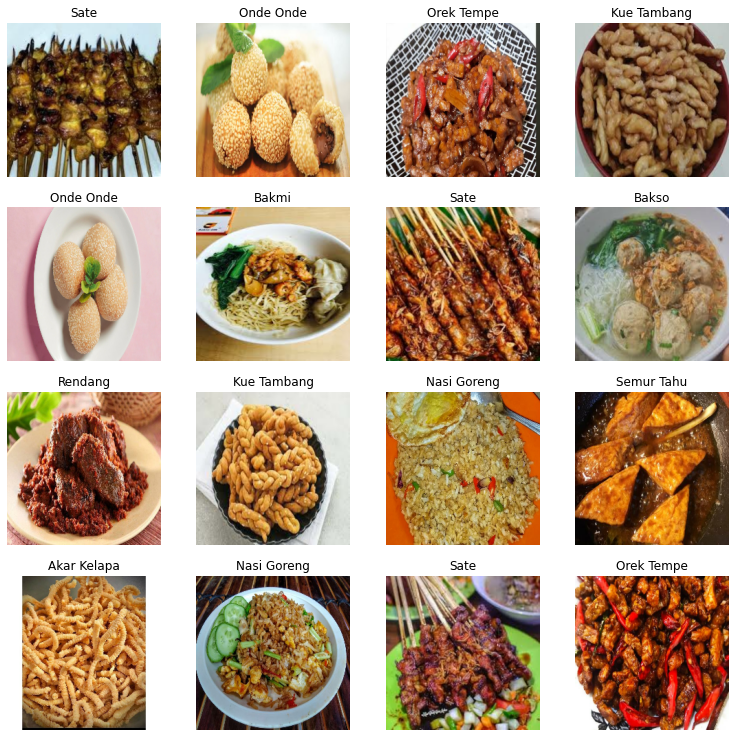

In [ ]:
plt.figure(figsize=(13, 13))
for images, labels in train_dataset.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
pretrained_model = InceptionV3(input_shape = (224, 224, 3),
                                include_top = False,
                                weights = 'imagenet')

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in pretrained_model.layers:
    layer.trainable = False

In [ ]:
last_layer = pretrained_model.get_layer('mixed5')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 12, 12, 768)


In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
#x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(12, activation='softmax')(x)

In [ ]:
model1 = Model(pretrained_model.input, x)

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
history = model1.fit(train_generator, 
                     epochs=20, 
                     steps_per_epoch=10, 
                     validation_data=val_generator, 
                     validation_steps=3,
                     verbose=1)

Epoch 1/20
10/10 [==============================] - 8s 582ms/step - loss: 3.4027 - accuracy: 0.2320
Epoch 2/20
10/10 [==============================] - 6s 591ms/step - loss: 1.3660 - accuracy: 0.5298
Epoch 3/20
10/10 [==============================] - 6s 577ms/step - loss: 0.8154 - accuracy: 0.7147
Epoch 4/20
10/10 [==============================] - 6s 609ms/step - loss: 0.5437 - accuracy: 0.8150
Epoch 5/20
10/10 [==============================] - 6s 571ms/step - loss: 0.5153 - accuracy: 0.8313
Epoch 6/20
10/10 [==============================] - 6s 569ms/step - loss: 0.3482 - accuracy: 0.8966
Epoch 7/20
10/10 [==============================] - 6s 578ms/step - loss: 0.3803 - accuracy: 0.8746
Epoch 8/20
10/10 [==============================] - 6s 565ms/step - loss: 0.3090 - accuracy: 0.9028
Epoch 9/20
10/10 [==============================] - 6s 590ms/step - loss: 0.2836 - accuracy: 0.9091
Epoch 10/20
10/10 [==============================] - 6s 589ms/step - loss: 0.1586 - accuracy: 0.9624

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

KeyError: ignored

In [ ]:
labels = train_generator.class_indices.keys()
uploaded = files.upload()

for paths in uploaded.keys():
 
  # predicting images
  path = paths
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model1.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))

In [ ]:
# saved_model_path = "/content/drive/MyDrive/JeDer/model1.h5"

# # Save model h5
# model1.save(saved_model_path)
# '''
# def download_history():
#   import pickle
#   from google.colab import files

#   with open('history.pkl', 'wb') as f:
#     pickle.dump(history.history, f)

#   files.download('history.pkl')

# download_history()
# '''

In [ ]:
# !tensorflowjs_converter --input_format=keras {saved_model_path} '/content/drive/MyDrive/model1'